In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [146]:
data = pd.read_csv("../../data/mergeddata2.csv")

In [147]:
data.head()

,None,Source_Port,Destination_Port,Protocol,Packet
0,854073,1,1,2,1
1,671064,0,0,2,1
2,988284,0,0,0,1
3,110636,1,1,2,0
4,352781,1,1,2,0


In [149]:
data = data.drop('None', axis=1)

In [150]:
data = data.convert_objects(convert_numeric=True)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [151]:
data.head()

,Source_Port,Destination_Port,Protocol,Packet
0,1,1,2,1
1,0,0,2,1
2,0,0,0,1
3,1,1,2,0
4,1,1,2,0


In [152]:
data = data.dropna(axis=0, how='all')

In [153]:
X = ["Source_Port", "Destination_Port","Protocol"]
y = "Packet"

In [154]:
n_features = data[X].shape[1]

In [155]:
any(data.isnull())

True

In [156]:
data["Packet"].value_counts()

1    1313690
0     434886
Name: Packet, dtype: int64

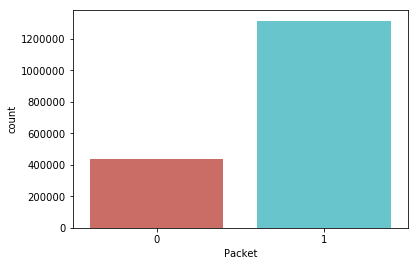

In [157]:
sns.countplot(x = 'Packet', data=data, palette='hls')

In [158]:
plt.show()

In [159]:
data.groupby('Packet').mean()

,Source_Port,Destination_Port,Protocol
Packet,,,
0,0.885782,0.839781,2.655448
1,0.756389,0.505917,1.249505


In [160]:
data.groupby("Source_Port").mean()

,Destination_Port,Protocol,Packet
Source_Port,,,
0,0.276902,1.718900,0.865643
1,0.672618,1.567075,0.720632


In [161]:
data.groupby("Destination_Port").mean()

,Source_Port,Protocol,Packet
Destination_Port,,,
0,0.628062,1.634888,0.903058
1,0.900594,1.574250,0.645369


In [162]:
data.groupby("Protocol").mean()

,Source_Port,Destination_Port,Packet
Protocol,,,
0,0.000000,0.000000,0.943118
1,0.907702,0.666771,0.984563
2,0.871252,0.658867,0.542231
3,0.000000,0.000000,1.000000
4,0.000000,0.000000,0.903592
5,0.560000,0.546667,1.000000
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,0.000000
8,1.000000,0.250000,1.000000


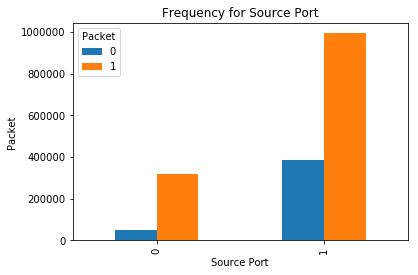

In [163]:
%matplotlib inline
pd.crosstab(data.Source_Port,data.Packet).plot(kind='bar')
plt.title('Frequency for Source Port')
plt.xlabel('Source Port')
plt.ylabel('Packet')
plt.savefig('src-port-packet')

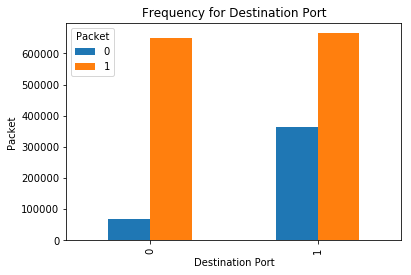

In [164]:
%matplotlib inline
pd.crosstab(data.Destination_Port,data.Packet).plot(kind='bar')
plt.title('Frequency for Destination Port')
plt.xlabel('Destination Port')
plt.ylabel('Packet')
plt.savefig('dst-port-packet')

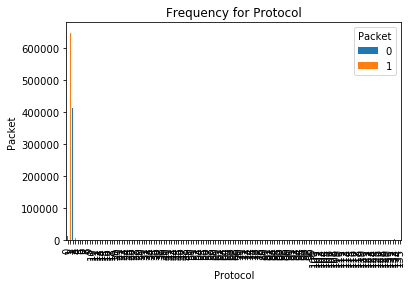

In [171]:
%matplotlib inline
plt.figure(figsize=(1,2))
pd.crosstab(data.Protocol,data.Packet).plot(kind='bar')
plt.title('Frequency for Protocol')
plt.xlabel('Protocol')
plt.ylabel('Packet')
plt.savefig('protocol-packet')

In [172]:
X_train, X_test, y_train, y_test = train_test_split(data[X], data[y], test_size=0.20, random_state=42)

In [173]:
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True]
[1 1 1]


In [174]:
import statsmodels.api as sm
logit_model=sm.Logit(data[y],data[X])
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.598975
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Packet   No. Observations:              1748576
Model:                          Logit   Df Residuals:                  1748573
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Apr 2018   Pseudo R-squ.:                -0.06786
Time:                        16:24:34   Log-Likelihood:            -1.0474e+06
converged:                       True   LL-Null:                   -9.8080e+05
                                        LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Source_Port          1.7217      0.004    386.787      0.000       1.713       1.730
Destination

In [175]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [176]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [177]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.832


In [178]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 66497  20678]
 [ 38345 224196]]


In [179]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.63      0.76      0.69     87175
          1       0.92      0.85      0.88    262541

avg / total       0.85      0.83      0.84    349716



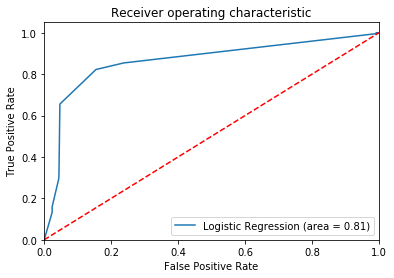

In [180]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()